# 주성분분석(PCA)를 사용한 회귀모델

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("data/MLB/MLB_2014_2017.csv")

### 게임 수 적은 표본 및 연봉정보 없는 표본 제거

In [3]:
data = data[lambda x: x.G >= 20]
data = data[lambda x: x.Salary > 0]
data = data.reset_index(drop=True)
data.shape

(1020, 35)

### 명목변수, 중복적용변수 제거

In [4]:
data = data.drop(["Name", "Id", "Tm", "Lg", "OPS", "OPS+"], axis=1)
data.shape

(1020, 29)

### 데이터 0-1 범위로 Scaling

In [5]:
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.272727,0.880282,0.827440,0.803681,0.577778,0.777273,0.625000,0.142857,0.610169,0.804511,...,0.366667,0.000000,0.266667,0.517241,0.000000,0.838710,0.750000,0.142857,0.064516,0.286488
1,0.227273,0.866197,0.714286,0.720859,0.459259,0.536364,0.482143,0.285714,0.237288,0.488722,...,0.100000,0.230769,0.133333,0.034483,0.142857,0.435484,0.583333,0.000000,0.000000,0.083612
2,0.181818,0.859155,0.743989,0.759202,0.392593,0.668182,0.607143,0.357143,0.254237,0.511278,...,0.100000,0.000000,0.466667,0.172414,0.095238,0.758065,0.750000,0.000000,0.000000,0.014515
3,0.272727,0.450704,0.355021,0.360429,0.185185,0.268182,0.339286,0.071429,0.118644,0.203008,...,0.033333,0.000000,0.200000,0.034483,0.190476,0.637097,0.583333,0.071429,0.000000,0.051839
4,0.136364,0.971831,0.947666,0.963190,0.614815,1.000000,0.839286,0.214286,0.118644,0.443609,...,0.166667,0.076923,0.333333,0.241379,0.142857,0.112903,0.000000,0.428571,0.322581,0.080268


### 주성분 설명력 확인

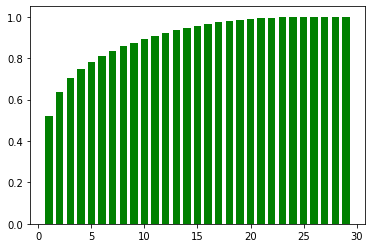

In [6]:
pca = PCA().fit(df)
var = pca.explained_variance_
y = np.cumsum(var)/np.sum(var)

plt.bar(np.arange(1,len(var)+1), y, color='green', width=0.7)
plt.show()

### 주성분 차원 결정 및 설명력

In [7]:
pca = PCA(n_components=10)
pca.fit(df)
v = pca.explained_variance_ratio_

# Adjusted R-Square를 최소화하고 설명력을 최대화하는 5차원으로 결정
dim = 5
Sum = 0
# 설명력 출력
for i in range(dim):
    Sum += v[i]
print(Sum)

0.783341739617057


### PCA 분석을 위한 데이터 세팅

In [8]:
pca = PCA(n_components=5)
pca_x = pd.DataFrame(pca.fit_transform(df))
pca_x.columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5']
salary = data['Salary']

data_pca = pd.concat([pca_x, salary], axis = 1)
data_pca.columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'Salary']
print(data_pca)

           pc1       pc2       pc3       pc4       pc5    Salary
0    -0.975066 -0.174240 -0.510541  0.291856 -0.128752   8666000
1    -0.186611  0.340633 -0.069707 -0.145272 -0.019925   2600000
2    -0.418662  0.183585 -0.380362 -0.009898 -0.129333    534000
3     0.652645 -0.066296 -0.107891  0.008863 -0.146525   1650000
4    -0.946708  0.690321  0.681199  0.372845 -0.423704   2500000
...        ...       ...       ...       ...       ...       ...
1015  0.813351  0.125356  0.052906  0.048080 -0.129000   4000000
1016  0.080607  0.030163  0.325451  0.332637  0.016021  20000000
1017 -0.853610  0.230366 -0.199123  0.021730 -0.057781   2000000
1018 -0.876377 -0.511585 -0.026131  0.063014 -0.080544  16500000
1019 -0.028465 -0.201262  0.184315 -0.221512  0.052666   2975000

[1020 rows x 6 columns]


In [9]:
import matplotlib
%matplotlib inline
from sklearn.decomposition import PCA

### PCA 데이터를 바탕으로 OLS 실행 결과

In [10]:
model = sm.OLS.from_formula('Salary ~ pc1 + pc2 + pc3 + pc5', data=data_pca)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     777.7
Date:                Sat, 07 Dec 2019   Prob (F-statistic):          3.13e-307
Time:                        15:57:50   Log-Likelihood:                -16751.
No. Observations:                1020   AIC:                         3.351e+04
Df Residuals:                    1015   BIC:                         3.354e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.192e+06   1.03e+05     60.148      0.0

In [11]:
data_pca.to_csv("data/data_pca.csv")

In [12]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [13]:
data_pca_f = pd.DataFrame(data_pca, 
                          columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5','Salary'])
data_pca_x = pd.DataFrame(data_pca_f, 
                          columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
data_pca_y = pd.DataFrame(data_pca_f, 
                          columns = ['Salary'])


### Cross-validation

In [14]:
cv = KFold(5, shuffle=True, random_state=0)
model = LinearRegression()

scores = np.zeros(5)
for i, (train_index, test_index) in enumerate(cv.split(data_pca_y)):
    X_train = data_pca_x.loc[train_index]
    y_train = data_pca_y['Salary'][train_index]
    X_test = data_pca_x.loc[test_index]
    y_test = data_pca_y['Salary'][test_index]
    model.fit(X_train, y_train)
    y_pre = model.predict(X_test)
    scores[i] = r2_score(y_test, y_pre)

print(scores)
print(np.mean(scores))

[0.7035573  0.75764995 0.78363781 0.7537523  0.75779461]
0.7512783941081012


### 주성분 구성요소 분석

In [16]:
df_com = pd.DataFrame(pca.components_, columns = data.columns)
df_com = df_com.drop("Salary", axis='columns')
df_com

,Age,G,PA,AB,R,H,2B,3B,HR,RBI,...,GDP,HBP,SH,SF,IBB,Career,Weight,Height,AllStar,Awards
0,-0.005925,-0.331917,-0.351452,-0.337117,-0.268342,-0.300877,-0.238197,-0.081001,-0.190402,-0.276343,...,-0.179478,-0.076228,0.021566,-0.139267,-0.090872,-0.044701,-0.037343,-0.035418,-0.104772,-0.062394
1,-0.313267,0.146913,0.101529,0.120100,0.078440,0.105470,0.051958,0.288136,-0.144464,-0.114220,...,-0.110655,0.012828,0.282658,-0.043208,-0.100744,-0.346280,-0.270783,-0.207699,-0.247414,-0.152587
2,0.351266,0.023862,0.035684,0.045179,0.011575,0.088081,0.011570,0.112485,-0.242644,-0.145559,...,0.065243,-0.036218,0.218905,0.040074,-0.024814,0.381251,-0.324590,-0.413959,0.176746,0.122627
3,-0.124895,-0.287788,-0.166242,-0.191633,0.119938,0.040039,0.074468,0.177941,0.082130,0.026710,...,-0.243936,0.033443,-0.171850,-0.104262,0.133097,-0.129076,-0.099695,-0.046550,0.123983,0.066578
4,0.068046,0.010332,0.006638,-0.030170,0.104362,-0.101745,-0.187499,0.274971,0.023287,-0.128165,...,-0.394367,0.031244,0.154340,-0.184586,-0.005428,0.084014,0.084045,0.412990,0.035859,0.019911


In [187]:
compo = []
for i in range(5):
    com = pd.DataFrame(df_com.loc[i])
    com.columns = ['minus']
    com = com.reindex(com['minus'].abs().sort_values(ascending=True).index)
    com['plus'] = 0
    copy = com.copy()
    k = 0
    
    for i in range(len(copy['minus'])):
        if copy['minus'].iloc[i]>0:
            k = copy['minus'].iloc[i]
            com['plus'].iloc[i] = k
            com['minus'].iloc[i] = 0
        
    compo.append(com)
    
print(compo[0])

            minus      plus
Age     -0.005925  0.000000
SH       0.000000  0.021566
Height  -0.035418  0.000000
Weight  -0.037343  0.000000
Career  -0.044701  0.000000
CS      -0.054739  0.000000
SB      -0.060351  0.000000
Awards  -0.062394  0.000000
HBP     -0.076228  0.000000
3B      -0.081001  0.000000
IBB     -0.090872  0.000000
AllStar -0.104772  0.000000
OBP     -0.104890  0.000000
BA      -0.107860  0.000000
SLG     -0.131475  0.000000
SF      -0.139267  0.000000
BB      -0.172901  0.000000
GDP     -0.179478  0.000000
HR      -0.190402  0.000000
SO      -0.193619  0.000000
2B      -0.238197  0.000000
R       -0.268342  0.000000
RBI     -0.276343  0.000000
H       -0.300877  0.000000
TB      -0.303152  0.000000
G       -0.331917  0.000000
AB      -0.337117  0.000000
PA      -0.351452  0.000000


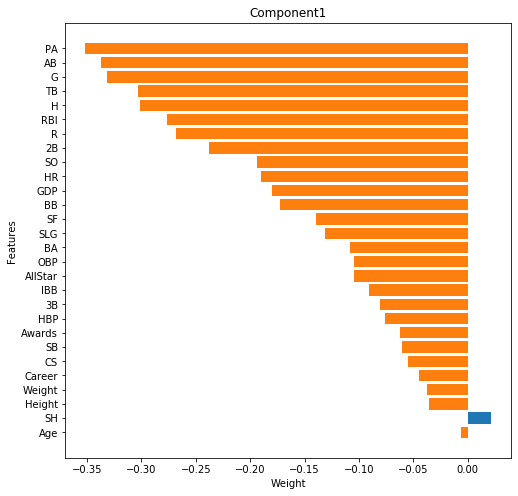

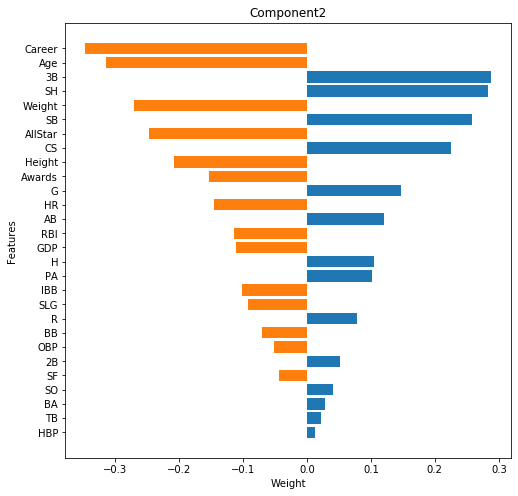

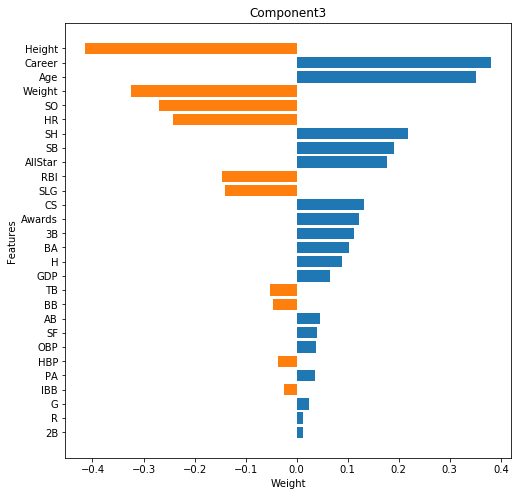

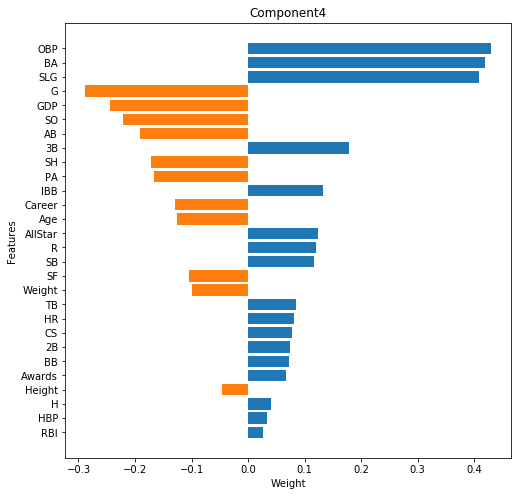

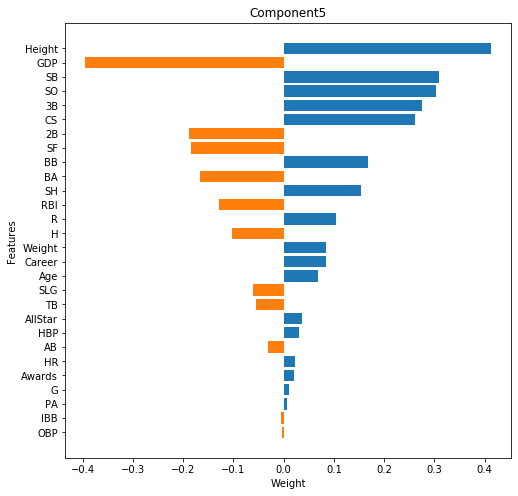

In [199]:
for i in range(5):
    plt.rcParams["figure.figsize"] = (8,8)
    plt.title('Component'+str(i+1))
    plt.barh(compo[i].index, compo[i]['minus'], color = 'tab:orange')
    plt.barh(compo[i].index, compo[i]['plus'], color = 'tab:blue')
    plt.xlabel('Weight')
    plt.ylabel('Features')
    plt.show()
